<a href="https://colab.research.google.com/github/thivagar-manickam/data-science-notebooks/blob/main/Iris%20Data%20Set/KMeans_Clustering_Using_Iris_DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this note book we are going to look into KMeans clustering Algorithm using the Iris Dataset


### Data Importing and Cleaning

In [3]:
import sklearn.datasets as datasets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [16]:
data = datasets.load_iris()
df = pd.DataFrame(data.data, columns=data['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# Checking for the null values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


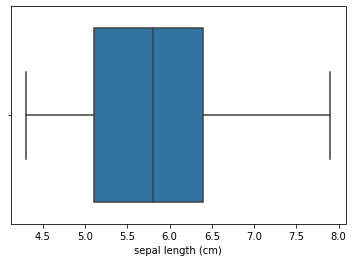

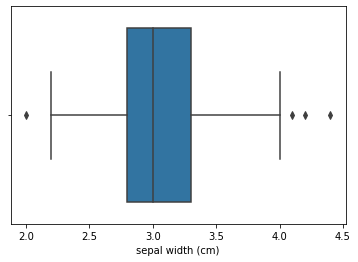

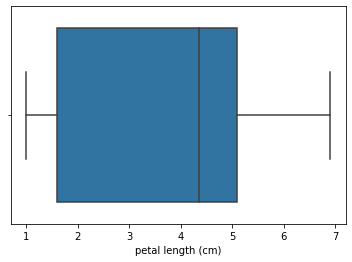

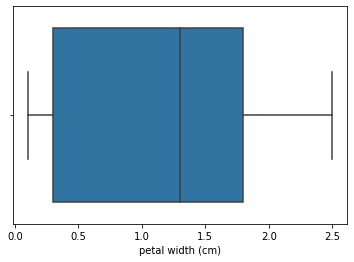

In [7]:
# Checking for the outliers
for col in df.columns:
  sns.boxplot(df[col])
  print("\n")
  plt.show()

In [17]:
# Removing the outliers in the sepal width(cm) param

q3 = df['sepal width (cm)'].quantile(0.75)
q1 = df['sepal width (cm)'].quantile(0.25)

IQR = q3 - q1

upper_whisker = q3 + (1.5 * IQR)
lower_whisker = q1 - (1.5 * IQR)

clean_df = df[~((df['sepal width (cm)'] > upper_whisker) | (df['sepal width (cm)'] < lower_whisker))]

In [ ]:
df.shape

(150, 5)

### Finding the Ideal number of cluster using the Elbow method and silhouette score with visualizer

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

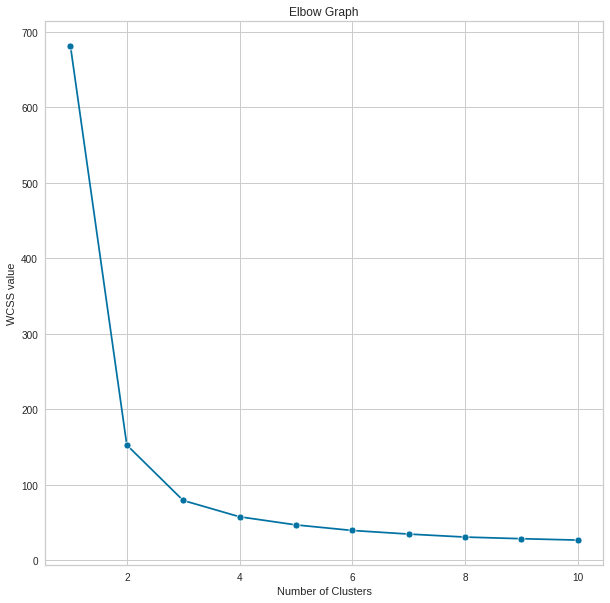

In [19]:
# Find the ideal cluster using the Elbow Method

wcss = []
cluster_range = range(1, 11)

for cluster in cluster_range:
  model = KMeans(n_clusters=cluster, init="k-means++", n_init=10, random_state=10)
  model.fit(df)
  wcss.append(model.inertia_)

plt.figure(figsize=(10, 10))
sns.lineplot(x=cluster_range, y=wcss, marker='o')
plt.title('Elbow Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS value')
plt.show()

**From the Elbow graph we can see that the ideal number of cluster for the dataset is 3. We can confirm this by checking the Silhouette Visualizer graph to see if there is any outlier or negative values for the cluster ranging from 2 to 6**

Cluster Number - 2


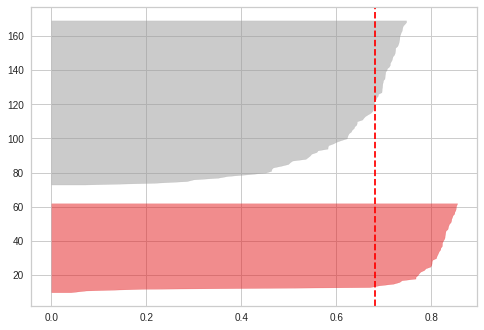



Cluster Number - 3


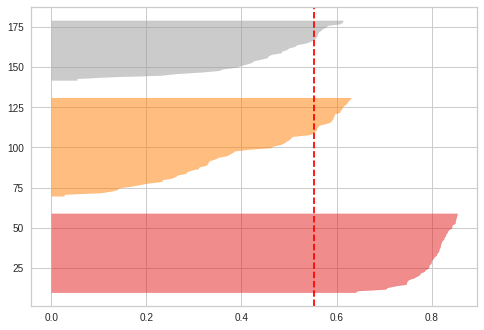



Cluster Number - 4


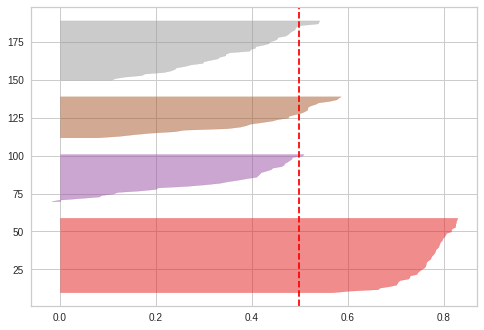



Cluster Number - 5


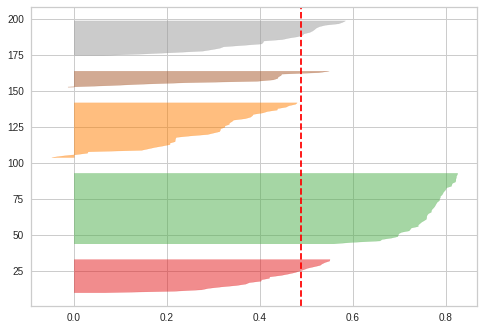



Cluster Number - 6


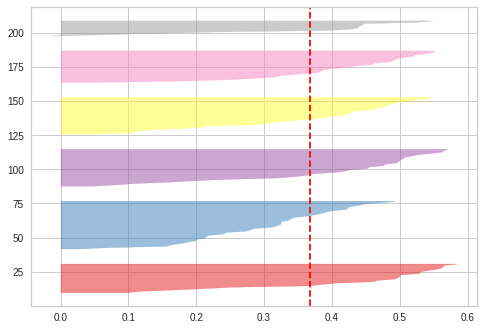

In [11]:
sil_range = range(2, 7)
for cluster in sil_range:
  model = KMeans(n_clusters=cluster, random_state=10)
  visualizer = SilhouetteVisualizer(model)
  visualizer.fit(df)
  print(f'Cluster Number - {cluster}')
  plt.show()
  print("\n")

**From the Elbow Method and Silhouette Visualizer we can see that the cluster value of 3 is the ideal for the given data set based on the available paramters**

### Building the Model and Visualizing the clusters

In [20]:
data_df = df.values

In [21]:
model = KMeans(n_clusters=3, random_state=10)
y_pred = model.fit_predict(data_df[:, :2])

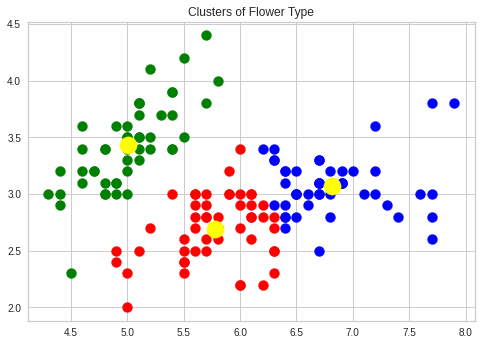

In [22]:
plt.scatter(data_df[y_pred == 0,0], data_df[y_pred == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(data_df[y_pred == 1,0], data_df[y_pred == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(data_df[y_pred == 2,0], data_df[y_pred == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(model.cluster_centers_[: , 0], model.cluster_centers_[:, 1], s=300, c='yellow', label='Centroid')
plt.title('Clusters of Flower Type')
plt.show()

### Building the KMeans algorithm using PCA dimensionality reduction

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [24]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [25]:
# Scaling the Data
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [26]:
# Performing Dimentionality reduction using PCA to 2 dimensions

pca_num_components = 2
reduced_data = PCA(n_components=pca_num_components).fit_transform(scaled_data)

result = pd.DataFrame(reduced_data, columns=['X-Column', 'Y-Column'])

In [27]:
model = KMeans(n_clusters=3, random_state=10)
result['clusters'] = model.fit_predict(result)

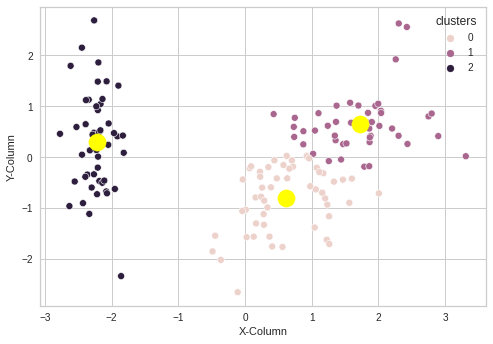

In [32]:
sns.scatterplot(x= result['X-Column'], y= result['Y-Column'], hue=result['clusters'])
plt.scatter(model.cluster_centers_[: , 0], model.cluster_centers_[:, 1], s=300, c='yellow', label='Centroid')
plt.show()